In [1]:
# from ultralytics import YOLO
import os
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def number_of_detections(annotations_folder):
    total_boxes = 0

    for root, dirs, files in os.walk(annotations_folder):
        for file in files:
            if file.endswith('.txt'):
                annotation_path = os.path.join(root, file)
                
                with open(annotation_path, 'r') as f:
                    # Count the number of lines in the annotation file
                    boxes_in_file = len(f.readlines())
                    total_boxes += boxes_in_file
    
    return total_boxes


annotations_folder = '/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/labels_10_copy/'

total_detections = number_of_detections(annotations_folder)

print(f"Total number of bounding boxes: {total_detections}")

Total number of bounding boxes: 206827


In [2]:
def load_yolo_annotations(file_path):
    """Load YOLO format annotations from a text file."""
    annotations = []
    with open(file_path, 'r') as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            annotations.append((class_id, x_center, y_center, width, height))
    return annotations

In [3]:
def draw_bounding_boxes(image, annotations):
    """Draw bounding boxes on the image using the provided annotations."""
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    image_width, image_height = image.size

    for annotation in annotations:
        class_id, x_center, y_center, width, height = annotation
        x_center *= image_width
        y_center *= image_height
        width *= image_width
        height *= image_height

        x_min = x_center - width / 2
        y_min = y_center - height / 2

        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min, y_min, f'Class {int(class_id)}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    plt.show()

In [4]:
# def process_directory(image_folder, annotation_folder):
#     """Process the directory and display images with bounding boxes."""
#     for root, dirs, files in os.walk(image_folder):
#         for file in files:
#             if file.endswith(('.png', '.jpg', '.jpeg', '.tiff', '.tif')):
#                 image_path = os.path.join(root, file)
#                 annotation_path = os.path.join(annotation_folder, os.path.relpath(root, image_folder), os.path.splitext(file)[0] + ".txt")

#                 if os.path.exists(annotation_path):
#                     image = Image.open(image_path)
#                     annotations = load_yolo_annotations(annotation_path)
#                     draw_bounding_boxes(image, annotations)

In [5]:
# import random

# image_paths = []
# images_folder = '/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/images'

# for root, dirs, files in os.walk(images_folder):
#         for file in files:
#             if file.endswith(('.png', '.jpg', '.jpeg', '.tiff', '.tif')):
#                 image_path = os.path.join(root, file)
#                 image_paths.append(image_path)
                
# for _ in range(50):
#     random_image_path = random.choice(image_paths)
#     relative_path = os.path.relpath(random_image_path, images_folder)
#     annotation_path = os.path.join(annotations_folder, os.path.splitext(relative_path)[0] + ".txt")

#     image = Image.open(random_image_path).convert("RGB")
#     annotations = load_yolo_annotations(annotation_path)

#     draw_bounding_boxes(image, annotations)
#     print(random_image_path)

/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/labels_1


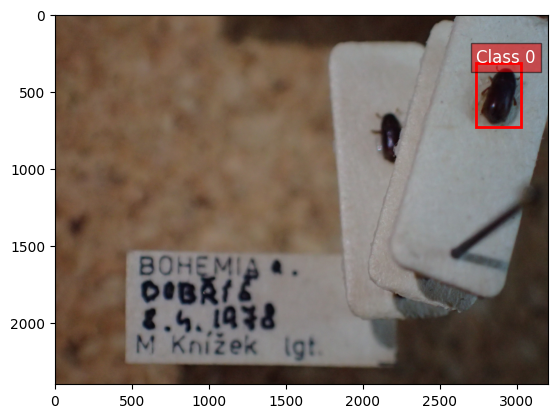

/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/labels_2


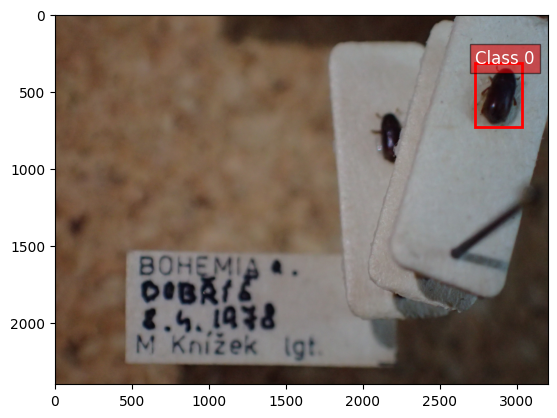

/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/labels_3


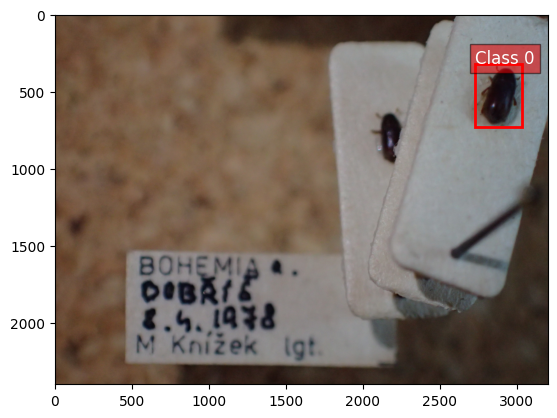

/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/labels_4


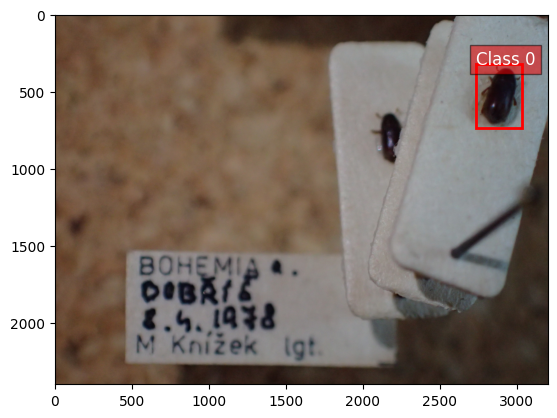

/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/labels_5


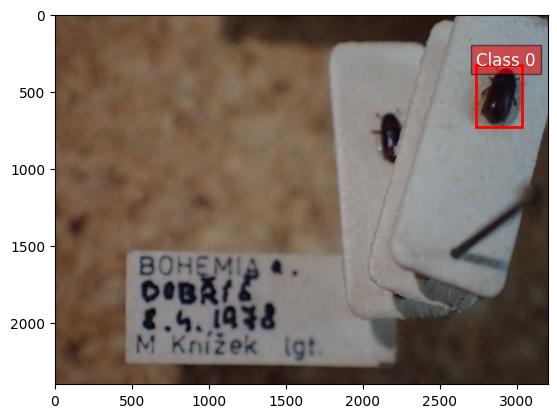

/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/labels_6


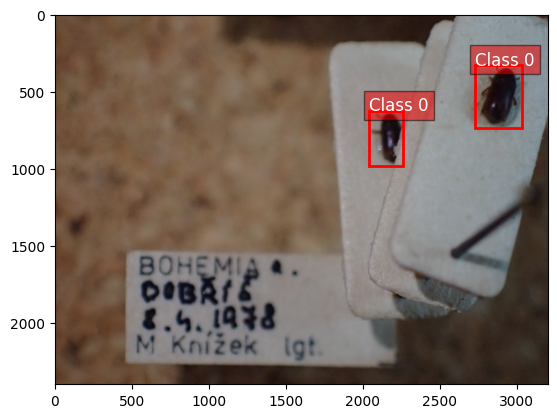

/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/labels_7


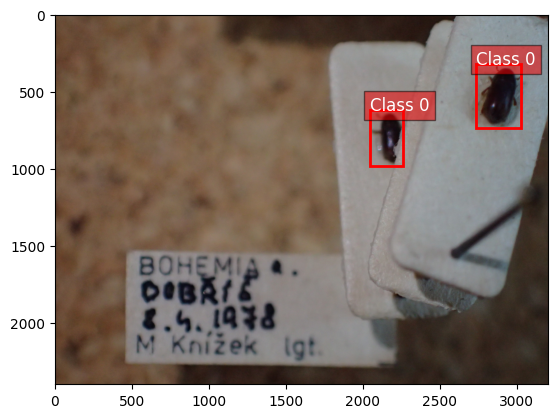

/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/labels_8


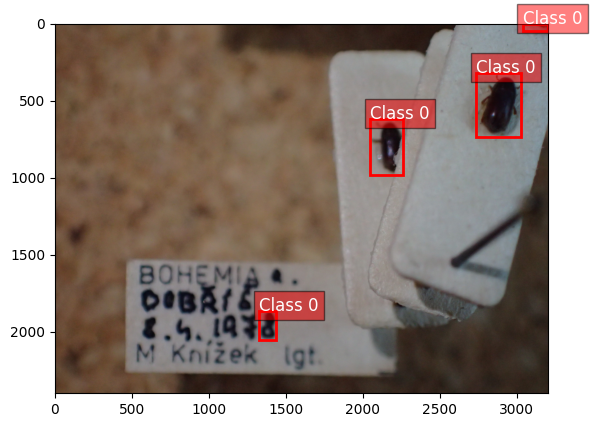

/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/labels_9


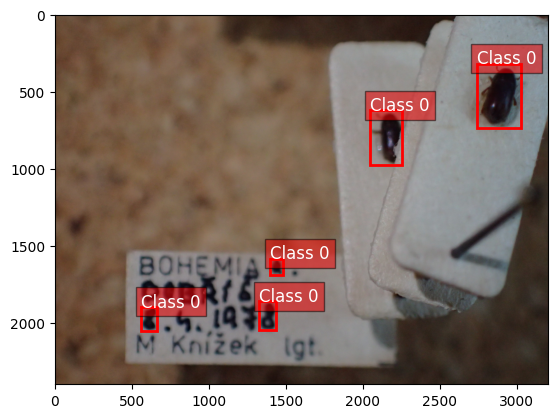

/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/labels_10


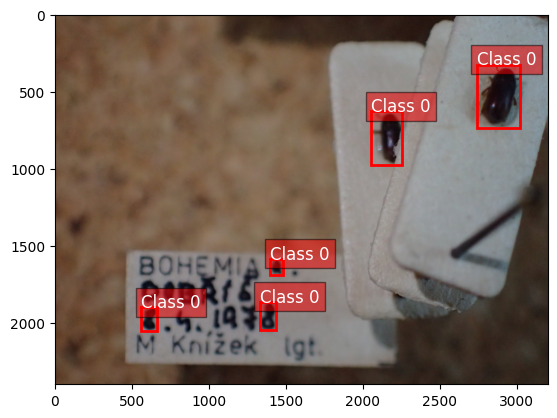

In [6]:
#example_image_path = '/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/images/0_Unknown/3ea29ffd217d1757aae48c0dcd4ef067.png'
example_image_path = '/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/images/0_Unknown/c8ccddae4a96eff91778f0a3591bcb00.png'
#example_image_path = '/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/images/Euwallacea_perbrevis/414e1b3e4070a41065515d776fdf138a.png'
#example_image_path = '/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/images/0_Unknown/dcd5598d680c4b908c0d990c8a854c7f.png'
#example_image_path = '/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/images/0_Unknown/5a66e5b1d521e174d49ff010f0e57297.png'
images_folder = '/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train/images'

annotations_folder = '/blue/hulcr/share/eric.kuo/Beetle_classifier/Data/00_Preprocessed_composite_images/train'
folders = []
for labels in os.listdir(annotations_folder):
    labels_path = os.path.join(annotations_folder, labels)
    if labels.startswith("labels"):
        folders.append(labels_path)
folders = [folder for folder in folders if folder.split('_')[-1].isdigit()]
folders = sorted(folders, key=lambda x: int(x.split('_')[-1]))

for labels in folders:
        print(labels)
        annotations_folder = labels
        relative_path = os.path.relpath(example_image_path, images_folder)
        annotation_path = os.path.join(annotations_folder, os.path.splitext(relative_path)[0] + ".txt")

        image = Image.open(example_image_path).convert("RGB")
        annotations = load_yolo_annotations(annotation_path)

        draw_bounding_boxes(image, annotations)
        #print(random_image_path)
        



